In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
y_train = train['label']
X_train = train.drop(columns=['label'])

In [4]:
example = X_train.iloc[1, :]
example = example.to_numpy()

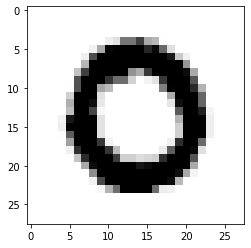

In [5]:
plt.imshow(example.reshape(28,28), cmap = 'binary')

In [6]:
y_train[1]

0

# Softmax Regression to Classify #

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [8]:
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 100, C = 10)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(softmax_reg, X_train_scaled, y_train, cv = 3)

In [10]:
scores.mean()

0.8967142857142857

In [11]:
scores.std()

0.002250472361603234

In [ ]:
softmax_reg.fit(X_train_scaled, y_train)

In [13]:
test_scaled = scaler.transform(test)
test_pred = softmax_reg.predict(test_scaled)
final = pd.DataFrame({'label':test_pred}, index = np.arange(1,len(test_pred)+1))
final.to_csv("final2.csv")

Kaggle Score - 0.90760

# Simple Neural Network #

In [14]:
X_train_nn = X_train.iloc[:35000,:].to_numpy()
y_train_nn = y_train[:35000].to_numpy()
X_valid = X_train.iloc[35000:,:].to_numpy()
y_valid = y_train[35000:].to_numpy()

In [15]:
scaler2 = StandardScaler()
X_train_nn_scaled = scaler2.fit_transform(X_train_nn)
X_valid_scaled = scaler2.transform(X_valid)

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [17]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
history = model.fit(X_train_nn_scaled, y_train_nn, epochs = 32, validation_data = (X_valid, y_valid), callbacks = [keras.callbacks.EarlyStopping(patience=5)])

Train on 35000 samples, validate on 7000 samples
Epoch 1/32
35000/35000 [==============================] - 2s 71us/sample - loss: 0.3745 - accuracy: 0.8983 - val_loss: 43.2575 - val_accuracy: 0.8043
Epoch 2/32
35000/35000 [==============================] - 2s 61us/sample - loss: 0.2262 - accuracy: 0.9402 - val_loss: 24.5152 - val_accuracy: 0.9013
Epoch 3/32
35000/35000 [==============================] - 2s 61us/sample - loss: 0.1952 - accuracy: 0.9504 - val_loss: 30.5268 - val_accuracy: 0.8911
Epoch 4/32
35000/35000 [==============================] - 2s 59us/sample - loss: 0.1570 - accuracy: 0.9572 - val_loss: 28.4742 - val_accuracy: 0.9079
Epoch 5/32
35000/35000 [==============================] - 2s 69us/sample - loss: 0.1300 - accuracy: 0.9634 - val_loss: 41.4761 - val_accuracy: 0.8604
Epoch 6/32
35000/35000 [==============================] - 2s 62us/sample - loss: 0.1236 - accuracy: 0.9643 - val_loss: 31.2902 - val_accuracy: 0.9144
Epoch 7/32
35000/35000 [===========================

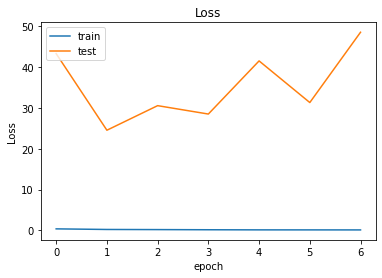

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
test_scaled2 = scaler2.transform(test)
test_pred = model.predict_classes(test_scaled2)
final = pd.DataFrame({'label':test_pred}, index = np.arange(1,len(test_pred)+1))
final.to_csv("final2.csv")

Kaggle score - 0.96585